In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# 데이터 불러오기

In [43]:
path = 'C:/Users/UserK/Desktop/Ranee/data/신용예측프로젝트/프로젝트 데이터/'

In [44]:
path = 'C:/Users/MSI/Desktop/study/Data/기업정보/'

In [131]:
import warnings
from glob import glob
import os
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일명 변경 dict
rename_dict = dict(zip(['기업정보요약', '재무제표정보', '경영진정보', '국가R&D과제', '국가R&D성과', '국가R&D연구보고서',
        '디자인권정보', '상표권정보', '신용등급정보', '실용신안정보', '온라인뉴스', '취업포탈리뷰',
        '특허정보상세', '패밀리특허정보'],
        ['comp_intro_test', 'comp_finance_test', 'comp_manager_test', 'ntis_assign_test',
        'ntis_accomp_test.csf', 'ntis_article_test', 'kisti_design_test', 'kisti_mark_test',
        'cri_test', 'kisti_utility_test', 'naver_news_test', 'jobplanet_review_test',
        'patent_detail', 'family_patent']))

# data 폴더 여부 확인 및 생성
tmp = glob(path + '*.csv')
if len(tmp)==28:
    os.makedirs(path, exist_ok=True)
    [os.rename(_, path +_[2:]) for _ in tmp]
del tmp

err_list = []
for ori_name in glob(path+'*_train.csv'):
    target = ori_name[7:-10]
    new_name = rename_dict.get(target)
    if new_name:
        new_name = ori_name.replace(target, new_name)
        os.rename(ori_name, new_name)
    elif not target.replace('_', '').replace('.', '').isalpha():
        err_list.append(ori_name)

for ori_name in glob(path+'*_test.csv'):
    target = ori_name[7:-9]
    new_name = rename_dict.get(target)
    if new_name:
        new_name = ori_name.replace(target, new_name)
        os.rename(ori_name, new_name)
    elif not target.replace('_', '').replace('.', '').isalpha():
        err_list.append(ori_name)

if err_list:
    [print(_) for _ in glob(path+'*.csv')]
else:
    del err_list, ori_name, target, new_name, rename_dict

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/UserK/Desktop/Ranee/data/신용예측프로젝트/프로젝트 데이터\\경영진정보_test.csv' -> 'C:/Users/UserK/Desktop/Ranee/data/신용예측프로젝트/프로젝트 데이터//Users/UserK/Desktop/Ranee/data/신용예측프로젝트/프로젝트 데이터\\경영진정보_test.csv'

- 기업정보요약 : comp_intro
- 재무제표정보 : comp_finance
- 경영진정보 : comp_manager
- 국가R&D과제 : ntis_assign (진행중인것 / 완료 --> 성과데이터로있음)
- 국가R&D성과 : ntis_accomp 
- 국가R&D연구보고서 : ntis_article
- 디자인권정보 : kisti_design
- 상표권정보 : kisti_mark
- 신용등급정보: cri
- 실용신안정보 : kisti_utility
- 온라인뉴스: naver_news
- 취업포탈리뷰 : jobplanet_review
- 특허정보상세 : patent_detail
- 패밀리특허정보 : family_patent

In [45]:
comp_manager = pd.read_csv(path +'경영진정보_train.csv')
ntis_assign = pd.read_csv(path +'국가R&D과제_train.csv')
ntis_accomp = pd.read_csv(path +'국가R&D성과_train.csv')
ntis_article = pd.read_csv(path +'국가R&D연구보고서_train.csv')
comp_intro = pd.read_csv(path +'기업정보요약_train.csv')
comp_spe_intro = pd.read_csv(path +'기업정보상세.csv')
kisti_design = pd.read_csv(path +'디자인권정보_train.csv')
kisti_mark = pd.read_csv(path +'상표권정보_train.csv')
cri = pd.read_csv(path +'신용등급정보_train.csv')
kisti_utility = pd.read_csv(path +'실용신안정보_train.csv')
naver_news = pd.read_csv(path +'온라인뉴스_train.csv')
comp_finance = pd.read_csv(path +'재무제표정보_train.csv')
jobplanet_review = pd.read_csv(path +'취업포탈리뷰_train.csv')
patent_detail = pd.read_csv(path +'특허정보상세_train.csv')
family_patent = pd.read_csv(path +'패밀리특허정보_train.csv')
mapping =  pd.read_csv(path + 'mapping_info.csv')
comp_spe_intro =  pd.read_csv(path + '기업정보상세.csv')

C:\Users\MSI\AppData\Local\Temp\ipykernel_25720\1103864065.py:2: DtypeWarning: Columns (42,44,46,48,51,56) have mixed types. Specify dtype option on import or set low_memory=False.
  ntis_assign = pd.read_csv(path +'국가R&D과제_train.csv')


In [4]:
comp_intro.head(5)

,Unnamed: 0,BusinessNum,cmpNm,기업명,ceoNm,telNo,faxTelNo,zip,adr,dtlAdr,cmpTypNm,cmpSclNm,pbcoGbNm,indCd1,indNm
0,0,1131201292,20210903,에**,김**,02 26333232,NaN,7295.0,서울특별시 영등포구 문래로20길,"60, 5층 505호 (문래동3가,메가벤처타워)",일반,중소기업,일반기업,42321.0,일반 통신 공사업
1,1,6058609398,20220308,두원건설***,이**,043 283 4567,043 292 2002,28536.0,충청북도 청주시 청원구 중앙로 140,4층 (우암동),일반,중소기업,일반기업,41100.0,건물 건설업
2,2,1138601802,20210903,(주)드림아이***,유**,070 77666664,02 62806509,8510.0,서울 금천구 벚꽃로 298,"903호,1312호 (가산동,대륭포스트타워6차)",외감,중소기업,일반기업,62010.0,컴퓨터 프로그래밍 서비스업
3,3,7048608706,20211201,(주)드림오브***,신**,02-854-8000,050-4199-5335,3900.0,서울 마포구 마포나루길 332,"선착장 (상암동,상암나루)",일반,중소기업,일반기업,71531.0,경영컨설팅업
4,4,5088103009,20211130,(주)세***,권**,054 853 0006,054 8539929,36660.0,경북 안동시 경북대로,"389, 101호 지하",일반,중소기업,일반기업,41220.0,토목시설물 건설업


In [49]:
def dot_split(row):
    row = str(row)
    if isinstance(row, str) : 
        return row.split('.')[0]
    else:
        return row 


In [ ]:
comp_intro['indCd1_str'] = comp_intro['indCd1'].apply(dot_split)

# 상품코드로 상품분류명

In [6]:
comp_intro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7804 non-null   int64  
 1   BusinessNum  7804 non-null   int64  
 2   cmpNm        7804 non-null   int64  
 3   기업명          7804 non-null   object 
 4   ceoNm        7804 non-null   object 
 5   telNo        7390 non-null   object 
 6   faxTelNo     5607 non-null   object 
 7   zip          6314 non-null   float64
 8   adr          7731 non-null   object 
 9   dtlAdr       6426 non-null   object 
 10  cmpTypNm     7804 non-null   object 
 11  cmpSclNm     7804 non-null   object 
 12  pbcoGbNm     6505 non-null   object 
 13  indCd1       7789 non-null   float64
 14  indNm        7787 non-null   object 
 15  indCd1_str   7804 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 975.6+ KB


In [7]:
comp_intro['indCd1_str'].unique()

array(['42321', '41100', '62010', '71531', '41220', '62021', '42320',
       '73209', '59110', '41111', '58221', '42310', '63991', '42132',
       '46522', '62090', '41229', '85501', '58211', '47912', '42110',
       '26410', '42201', '61210', '52990', '47420', '16300', '42420',
       '26429', '42311', '58222', '47910', '42131', '42491', '41121',
       '46520', '28121', '46109', '63900', '42322', '42129', '46103',
       '90191', '94990', '72111', '26120', '41129', '74100', '63100',
       '72120', '46730', '17223', '42121', '42204', '42120', '63120',
       '75900', '46491', '59114', '58200', '41221', '47312', '60229',
       '62020', '41000', '61000', '47592', '28510', '42300', '61220',
       '58220', '46599', '45219', '52991', '42412', '46510', '42499',
       '59113', '46800', '61291', '46453', '42136', '20499', '42130',
       '68112', '42134', '70100', '29299', '29162', '46595', '26420',
       '59100', '47320', '46443', '55104', '75991', '63111', '63990',
       '41119', '302

In [53]:
df_industry = pd.read_excel(path+'한국표준산업분류표.xlsx',index_col=1).reset_index().fillna(method= 'ffill')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/MSI/Desktop/study/Data/기업정보/한국표준산업분류표.xlsx'

In [8]:
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   항목명     1197 non-null   object 
 1   대분류코드   1197 non-null   object 
 2   중분류코드   1197 non-null   float64
 3   항목명.1   1197 non-null   object 
 4   소분류코드   1197 non-null   float64
 5   항목명.2   1197 non-null   object 
 6   세분류코드   1197 non-null   float64
 7   항목명.3   1197 non-null   object 
 8   세세분류코드  1197 non-null   float64
 9   항목명.4   1197 non-null   object 
dtypes: float64(4), object(6)
memory usage: 93.6+ KB


In [11]:
def namee(row) :
    return row.split('(')[0]

df_industry['항목명'] = df_industry['항목명'].apply(namee)

In [12]:
df_industry

,항목명,대분류코드,중분류코드,항목명.1,소분류코드,항목명.2,세분류코드,항목명.3,세세분류코드,항목명.4
0,"농업, 임업 및 어업",A,1.0,농업,11.0,작물 재배업,111.0,곡물 및 기타 식량작물 재배업,1110.0,곡물 및 기타 식량작물 재배업
1,"농업, 임업 및 어업",A,1.0,농업,11.0,작물 재배업,112.0,"채소, 화훼작물 및 종묘 재배업",1121.0,채소작물 재배업
2,"농업, 임업 및 어업",A,1.0,농업,11.0,작물 재배업,112.0,"채소, 화훼작물 및 종묘 재배업",1122.0,화훼작물 재배업
3,"농업, 임업 및 어업",A,1.0,농업,11.0,작물 재배업,112.0,"채소, 화훼작물 및 종묘 재배업",1123.0,종자 및 묘목 생산업
4,"농업, 임업 및 어업",A,1.0,농업,11.0,작물 재배업,113.0,"과실, 음료용 및 향신용 작물 재배업",1131.0,과실작물 재배업
...,...,...,...,...,...,...,...,...,...,...
1192,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,T,97.0,가구 내 고용활동,970.0,가구 내 고용활동,9700.0,가구 내 고용활동,97000.0,가구 내 고용활동
1193,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,T,98.0,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동,981.0,자가 소비를 위한 가사 생산 활동,9810.0,자가 소비를 위한 가사 생산 활동,98100.0,자가 소비를 위한 가사 생산 활동
1194,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,T,98.0,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동,982.0,자가 소비를 위한 가사 서비스 활동,9820.0,자가 소비를 위한 가사 서비스 활동,98200.0,자가 소비를 위한 가사 서비스 활동
1195,국제 및 외국기관,U,99.0,국제 및 외국기관,990.0,국제 및 외국기관,9900.0,국제 및 외국기관,99001.0,주한 외국 공관


In [15]:
df_industry_small = df_industry[['항목명','항목명.1','항목명.2','항목명.3','세세분류코드']].rename(columns={'항목명' : '대분류', 
                                                                                           '항목명.1' : '중분류', '항목명.2' : '소분류', 
                                                                                           '항목명.3' : '세분류','세세분류코드':'indCd1_str'})
df_industry_small['indCd1_str'] = df_industry_small['indCd1_str'].apply(dot_split)
df_industry_small

,대분류,중분류,소분류,세분류,indCd1_str
0,"농업, 임업 및 어업",농업,작물 재배업,곡물 및 기타 식량작물 재배업,1110
1,"농업, 임업 및 어업",농업,작물 재배업,"채소, 화훼작물 및 종묘 재배업",1121
2,"농업, 임업 및 어업",농업,작물 재배업,"채소, 화훼작물 및 종묘 재배업",1122
3,"농업, 임업 및 어업",농업,작물 재배업,"채소, 화훼작물 및 종묘 재배업",1123
4,"농업, 임업 및 어업",농업,작물 재배업,"과실, 음료용 및 향신용 작물 재배업",1131
...,...,...,...,...,...
1192,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,가구 내 고용활동,가구 내 고용활동,가구 내 고용활동,97000
1193,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동,자가 소비를 위한 가사 생산 활동,자가 소비를 위한 가사 생산 활동,98100
1194,가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동,달리 분류되지 않은 자가 소비를 위한 가구의 재화 및 서비스 생산활동,자가 소비를 위한 가사 서비스 활동,자가 소비를 위한 가사 서비스 활동,98200
1195,국제 및 외국기관,국제 및 외국기관,국제 및 외국기관,국제 및 외국기관,99001


In [14]:
comp_intro_m1 = pd.merge(comp_intro,df_industry_small,on='indCd1_str')
comp_intro_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5909 non-null   int64  
 1   BusinessNum  5909 non-null   int64  
 2   cmpNm        5909 non-null   int64  
 3   기업명          5909 non-null   object 
 4   ceoNm        5909 non-null   object 
 5   telNo        5611 non-null   object 
 6   faxTelNo     4141 non-null   object 
 7   zip          4685 non-null   float64
 8   adr          5878 non-null   object 
 9   dtlAdr       4771 non-null   object 
 10  cmpTypNm     5909 non-null   object 
 11  cmpSclNm     5909 non-null   object 
 12  pbcoGbNm     4808 non-null   object 
 13  indCd1       5909 non-null   float64
 14  indNm        5908 non-null   object 
 15  indCd1_str   5909 non-null   object 
 16  대분류          5909 non-null   object 
 17  중분류          5909 non-null   object 
 18  소분류          5909 non-null   object 
 19  세분류   

In [35]:
len(comp_intro_m1['indCd1_str'].unique())

469

In [15]:
comp_intro_m1['대분류'].value_counts()

대분류
정보통신업(58~63)                       2114
건설업(41~42)                         2061
도매 및 소매업(45~47)                     652
제조업(10~34)                          504
전문, 과학 및 기술 서비스업(70~73)             221
사업시설 관리, 사업 지원 및 임대 서비스업(74~76)      97
협회 및 단체, 수리 및 기타 개인 서비스업(94~96)      55
부동산업(68)                             47
운수 및 창고업(49~52)                      43
금융 및 보험업(64~66)                      34
숙박 및 음식점업(55~56)                     26
교육 서비스업(85)                          25
예술, 스포츠 및 여가관련 서비스업(90~91)           12
수도, 하수 및 폐기물 처리, 원료 재생업(36~39)        6
보건업 및 사회복지 서비스업(86~87)                5
전기, 가스, 증기 및 공기 조절 공급업(35)            4
공공 행정, 국방 및 사회보장 행정(84)               1
농업, 임업 및 어업(01~03)                    1
광업(05~08)                             1
Name: count, dtype: int64

In [16]:
comp_intro_m1['중분류'].value_counts()

중분류
전문직별 공사업                   1586
컴퓨터 프로그래밍, 시스템 통합 및 관리업    1098
출판업                         708
종합 건설업                      475
도매 및 상품 중개업                 456
                           ... 
공공 행정, 국방 및 사회보장 행정           1
농업                            1
항공 운송업                        1
비금속광물 광업; 연료용 제외              1
환경 정화 및 복원업                   1
Name: count, Length: 64, dtype: int64

In [17]:
comp_intro_m1.isnull().sum()

Unnamed: 0        0
BusinessNum       0
cmpNm             0
기업명               0
ceoNm             0
telNo           298
faxTelNo       1768
zip            1224
adr              31
dtlAdr         1138
cmpTypNm          0
cmpSclNm          0
pbcoGbNm       1101
indCd1            0
indNm             1
indCd1_str        0
대분류               0
중분류               0
소분류               0
세분류               0
dtype: int64

In [145]:
comp_intro_m1.loc[comp_intro_m1['cmpSclNm'] == '기타(비영리법인)']

,Unnamed: 0,BusinessNum,cmpNm,기업명,ceoNm,telNo,faxTelNo,zip,adr,dtlAdr,cmpTypNm,cmpSclNm,pbcoGbNm,indCd1,indNm,indCd1_str,대분류,중분류,소분류,세분류
1050,275,1088209536,20221022,현대산업정보***,최**,02-3143-0041,NaN,NaN,서울 마포구 월드컵로28길 20 (성산동),NaN,일반,기타(비영리법인),NaN,71531.0,경영컨설팅업,71531,"전문, 과학 및 기술 서비스업",전문 서비스업,회사 본부 및 경영 컨설팅 서비스업,경영 컨설팅 및 공공 관계 서비스업
3573,2202,6158103807,20211229,(주)장유정***,박**,055 331 7456,055 331 7457,51008.0,경남 김해시 장유로329번길 36-17,1층 (신문동),일반,기타(비영리법인),일반기업,42322.0,내부 통신배선 공사업,42322,건설업,전문직별 공사업,전기 및 통신 공사업,통신 공사업
3710,82,8728203394,20221022,한국저작권***,박**,02-1588-0190,NaN,NaN,"서울특별시 마포구 월드컵북로 400 9층 (상암동,서울산업진흥원빌딩)",NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3711,313,1198209415,20210908,(사)한국화학안***,지**,031-410-2991,031-410-2994,7623.0,서울 강서구 공항대로,"36, 302호 (공항동)",일반,기타(비영리법인),일반기업,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3712,523,1058209828,20221022,국제개발협력민간***,오**,02-2279-1705,NaN,NaN,"서울 마포구 독막로 282 4층 (대흥동,대흥빌딩)",NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3713,699,2768207917,20221022,컨선월드와이***,이준모외***,02-324-3900,NaN,NaN,"서울 마포구 양화로11길 12 5층 (서교동,현담빌딩)",NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3714,1022,1248209725,20221022,인권재***,박**,02-363-5855,NaN,NaN,"서울특별시 은평구 증산로 403-1 2층 (신사동,복지빌딩)",NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3715,1140,2068209956,20221022,어린이와작은도서***,백**,02-388-5933,NaN,NaN,서울 마포구 월드컵북로5가길 8-7 (서교동),NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3716,1512,1168206394,20211228,(사)한국정보산업***,정**,02 780 0201,02 782 1266,6221.0,서울 강남구 테헤란로 222,"3층, 4층 (역삼동,도원빌딩)",일반,기타(비영리법인),일반기업,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
3717,2010,8588207928,20221022,남북보건의료교***,배**,02-712-5587,NaN,NaN,"서울특별시 마포구 큰우물로 76 413호 (도화동,고려빌딩)",NaN,일반,기타(비영리법인),NaN,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체


In [146]:
comp_intro_m1.loc[comp_intro_m1['cmpSclNm'] == '대기업(금융)']

,Unnamed: 0,BusinessNum,cmpNm,기업명,ceoNm,telNo,faxTelNo,zip,adr,dtlAdr,cmpTypNm,cmpSclNm,pbcoGbNm,indCd1,indNm,indCd1_str,대분류,중분류,소분류,세분류
4540,373,2068103702,20210818,케이씨에이손해사정***,허**,02 450 2973,02 450 2975,4143.0,서울 마포구 마포대로 137,(공덕동),외감,대기업(금융),일반기업,66201.0,손해사정업,66201,금융 및 보험업,금융 및 보험관련 서비스업,보험 및 연금관련 서비스업,보험 및 연금관련 서비스업
5817,5245,2208702750,20210908,카카오페이증권***,김대홍외***,16008515,02 60998519,13529.0,경기 성남시 분당구 판교역로146번길 20,"12층 (백현동,오피스에이치)",외감,대기업(금융),일반기업,66121.0,증권 중개업,66121,금융 및 보험업,금융 및 보험관련 서비스업,금융 지원 서비스업,증권 및 선물 중개업


In [18]:
comp_intro_m1.loc[comp_intro_m1['pbcoGbNm'] == '공기업']

,Unnamed: 0,BusinessNum,cmpNm,기업명,ceoNm,telNo,faxTelNo,zip,adr,dtlAdr,cmpTypNm,cmpSclNm,pbcoGbNm,indCd1,indNm,indCd1_str,대분류,중분류,소분류,세분류
3722,3642,2098206974,20220128,영상물등급***,채**,02 31534300,02 31534337,48058.0,부산 해운대구 센텀서로 39,(우동),일반,기타(비영리법인),공기업,94990.0,그 외 기타 협회 및 단체,94990,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",협회 및 단체,기타 협회 및 단체,그 외 기타 협회 및 단체
5286,1088,1058201494,20211201,(학)서강***,박**,02 705 8114,02 705 8147,4107.0,서울 마포구 백범로 35,(신수동),일반,기타(비영리법인),공기업,85302.0,대학교,85302,교육 서비스업(85),교육 서비스업,고등 교육기관,고등 교육기관
5288,5300,1058200553,20211201,서강대**,박**,02 705 8114,02-718-2065,4107.0,서울 마포구 백범로 35,(신수동),일반,기타(비영리법인),공기업,85302.0,대학교,85302,교육 서비스업(85),교육 서비스업,고등 교육기관,고등 교육기관
5628,2440,6148200106,20211228,정보통신기획***,석**,042-612-8001,042-612-8809,34054.0,대전 유성구 유성대로 1548,(화암동),일반,기타(비영리법인),공기업,70209.0,기타 인문 및 사회과학 연구개발업,70209,"전문, 과학 및 기술 서비스업(70~73)",연구개발업,인문 및 사회과학 연구개발업,인문 및 사회과학 연구개발업


# 산업분야별 매출액 대표값 차이 유무

In [39]:
comp_finance

,Unnamed: 0,BusinessNum,stYear,stNm,acctCd,accNm,acctAmt
0,0,1051505526,NaN,NaN,NaN,NaN,NaN
1,1,2118605035,2017.0,재무상태표,M11000,유동자산,9440422.000
2,2,2118605035,2017.0,재무상태표,M11100,당좌자산,9358829.000
3,3,2118605035,2017.0,재무상태표,M11130,매출채권,1934474.000
4,4,2118605035,2017.0,재무상태표,M11500,재고자산,81593.000
...,...,...,...,...,...,...,...
888629,888629,6138108916,2021.0,성장성지표,MA1600,매출 증가율,-4.190
888630,888630,6138108916,2021.0,성장성지표,MA5100,총자산,3618115.000
888631,888631,6138108916,2021.0,성장성지표,MA5300,자기자본,2511720.000
888632,888632,6138108916,2021.0,성장성지표,MA5900,차입금,0.000


In [23]:
pv1 = comp_finance.pivot_table(index=['BusinessNum','accNm'] , values='acctAmt', aggfunc='mean').reset_index()
df_sales = pv1.loc[pv1['accNm'] == '매출액']

In [24]:
comp_intro_m2 = pd.merge(comp_intro_m1, df_sales, on='BusinessNum')

In [29]:
# 귀무가설 : 정규성을 따른다 
# 대립가설 : 정규성을 따르지 않는다.
stats.normaltest(comp_intro_m2['acctAmt']) # < 0.05 -> 귀무가설 기각

NormaltestResult(statistic=10592.817202765118, pvalue=0.0)

In [32]:
# 귀무가설 : 대분류별 중앙값 차이있다
# 귀무가설 : 대분류별 중앙값 차이없다
grouped_data = [comp_intro_m2[comp_intro_m2['대분류'] == group]['acctAmt'] for group in comp_intro_m2['대분류'].unique()]
stats.kruskal(*grouped_data)

KruskalResult(statistic=244.18752631970986, pvalue=3.2036747297560524e-42)

In [33]:
comp_finance

,Unnamed: 0,BusinessNum,stYear,stNm,acctCd,accNm,acctAmt
0,0,1051505526,NaN,NaN,NaN,NaN,NaN
1,1,2118605035,2017.0,재무상태표,M11000,유동자산,9440422.000
2,2,2118605035,2017.0,재무상태표,M11100,당좌자산,9358829.000
3,3,2118605035,2017.0,재무상태표,M11130,매출채권,1934474.000
4,4,2118605035,2017.0,재무상태표,M11500,재고자산,81593.000
...,...,...,...,...,...,...,...
888629,888629,6138108916,2021.0,성장성지표,MA1600,매출 증가율,-4.190
888630,888630,6138108916,2021.0,성장성지표,MA5100,총자산,3618115.000
888631,888631,6138108916,2021.0,성장성지표,MA5300,자기자본,2511720.000
888632,888632,6138108916,2021.0,성장성지표,MA5900,차입금,0.000


# 설립연도일 포함된 회사정보

In [50]:
comp_spe_intro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9881 entries, 0 to 9880
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9881 non-null   int64  
 1   사업자등록번호     9881 non-null   int64  
 2   Unnamed: 2  0 non-null      float64
 3   기업명         9881 non-null   object 
 4   기업영문명       8998 non-null   object 
 5   대표자명        9881 non-null   object 
 6   종업원수        9274 non-null   float64
 7   종업원수기준년월    9217 non-null   object 
 8   산업분류코드      9851 non-null   float64
 9   산업분류코드설명    9849 non-null   object 
 10  기업규모        9881 non-null   object 
 11  기업형태        9881 non-null   object 
 12  업태명         8658 non-null   object 
 13  설립일         9412 non-null   float64
 14  이메일주소       4076 non-null   object 
 15  전화번호        9330 non-null   object 
 16  팩스전화번호      7868 non-null   object 
 17  우편번호        9011 non-null   float64
 18  주소          9797 non-null   object 
 19  상세주보        9157 non-null  

In [51]:
comp_spe_intro.head(10)

,Unnamed: 0,사업자등록번호,Unnamed: 2,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,기업형태,업태명,설립일,이메일주소,전화번호,팩스전화번호,우편번호,주소,상세주보
0,0,1050508965,NaN,크린토**,Cleanto***,강**,NaN,NaN,96910.0,세탁업,중소기업,폐업,기타서비스업,NaN,NaN,NaN,NaN,3998.0,서울 마포구 동교로17길,"91, 1층 (성산동)"
1,1,1010204456,NaN,씨앤피비즈***,C&P BIZ SOLUT***,함**,5.0,Jun-21,46510.0,"컴퓨터 및 주변장치, 소프트웨어 도매업",중소기업,일반,도소매/서비스/소매/제조업/통신업,20000414.0,djham29@hanmail.net,02-334-0349,02-338-0349,3966.0,서울 마포구 월드컵북로 137,"(성산동,C.S타워 B3호)"
2,2,1048107174,NaN,(주)씨트랜***,"SEATRANS SHIPPING CO.,***",주**,12.0,Dec-20,50130.0,기타 해상 운송업,중소기업,일반,도매업/서비스,20010222.0,NaN,02-322-4890,02-322-4891,4031.0,서울 마포구 월드컵북로1길 26-16,"2층 (서교동,G-Art)"
3,3,1018102731,NaN,(주)파***,"Power PT Co., L***",이**,18.0,Mar-19,73203.0,시각 디자인업,중소기업,일반,서비스외,20030909.0,account@powerpt.co.kr,02 733 8209,02 733 8205,4172.0,서울 마포구 삼개로 27,2층 (도화동)
4,4,1018606595,NaN,(주)에이치제이디벨***,"HJ Development Co., L***",홍**,3.0,Dec-20,68122.0,비주거용 건물 개발 및 공급업,중소기업,외감,서비스 외,20090520.0,NaN,02 718 7844,02 721 5550,4174.0,서울특별시 마포구 마포대로 34,(도화동)
5,5,1018609361,NaN,(주)제인디엠씨***,"JaneDMC Korea Co., L***",한**,19.0,Apr-20,75210.0,여행사업,중소기업,일반,"도매/도매 및 소매업/사업시설관리 및 사업지원서비스업/서비스/전문, 과학 및 기술서비스업",20060103.0,darling@janetour.com,02 720 7506,02 720 7502,4209.0,서울특별시 마포구 만리재로 51,4층 (신공덕동)
6,6,1018606703,NaN,(주)에포크미디어***,Epoch Media Korea I***,정**,18.0,Dec-21,59120.0,"영화, 비디오물 및 방송 프로그램 제작 관련 서비스업",중소기업,일반,서비스/정보통신업,20130424.0,NaN,02-732-8608,02-732-8609,4146.0,서울 마포구 마포대로 109,"N동 34층 3403호 (공덕동,롯데캐슬프레지던트)"
7,7,1048106371,NaN,(주)래딕스글***,"RADIXGLOBIZ CO.,L***",조**,25.0,Jun-21,46320.0,가공식품 도매업,중소기업,일반,도．소매/도매/부동산/서비스,19970801.0,jwjung@theradix.co.kr,02-706-8715,02-737-2077,4168.0,서울 마포구 마포대로 86,"8층 (도화동,창강빌딩)"
8,8,1048104500,NaN,아라마크***,"Aramark Co., L***",심성호외***,789.0,Mar-21,56130.0,기관 구내식당업,중견기업,외감,도매/소매/음식,19930701.0,hong-sh@arakor.co.kr,02 32788000,02 778 9380,4143.0,서울 마포구 마포대로 137,8층 (공덕동)
9,9,1010109319,NaN,드림오**,dream off***,박**,1.0,Jun-20,46800.0,상품 종합 도매업,중소기업,일반,"도매,소매",20020501.0,NaN,02 336 5351,02 336 5344,4030.0,서울 마포구 동교로 150,(서교동)


In [48]:
comp_spe_intro['설립일_dt'] = pd.to_datetime(comp_spe_intro['설립일'].apply(dot_split))
comp_spe_intro['설립일_year'] = comp_spe_intro['설립일_dt'].dt.year

NameError: name 'dot_split' is not defined

In [52]:
comp_spe_intro['산업분류코드'] = comp_spe_intro['산업분류코드'].apply(dot_split)

In [72]:
comp_spe_intro = pd.merge(comp_spe_intro,df_industry_small,left_on='산업분류코드', right_on='indCd1_str')
comp_spe_intro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  7490 non-null   int64         
 1   사업자등록번호     7490 non-null   int64         
 2   Unnamed: 2  0 non-null      float64       
 3   기업명         7490 non-null   object        
 4   기업영문명       6846 non-null   object        
 5   대표자명        7490 non-null   object        
 6   종업원수        7116 non-null   float64       
 7   종업원수기준년월    7074 non-null   object        
 8   산업분류코드      7490 non-null   object        
 9   산업분류코드설명    7489 non-null   object        
 10  기업규모        7490 non-null   object        
 11  기업형태        7490 non-null   object        
 12  업태명         6348 non-null   object        
 13  설립일         7248 non-null   float64       
 14  이메일주소       2945 non-null   object        
 15  전화번호        7099 non-null   object        
 16  팩스전화번호      5999 non-nul

In [48]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  7490 non-null   int64         
 1   사업자등록번호     7490 non-null   int64         
 2   Unnamed: 2  0 non-null      float64       
 3   기업명         7490 non-null   object        
 4   기업영문명       6846 non-null   object        
 5   대표자명        7490 non-null   object        
 6   종업원수        7116 non-null   float64       
 7   종업원수기준년월    7074 non-null   object        
 8   산업분류코드      7490 non-null   object        
 9   산업분류코드설명    7489 non-null   object        
 10  기업규모        7490 non-null   object        
 11  기업형태        7490 non-null   object        
 12  업태명         6348 non-null   object        
 13  설립일         7248 non-null   float64       
 14  이메일주소       2945 non-null   object        
 15  전화번호        7099 non-null   object        
 16  팩스전화번호      5999 non-nul

In [49]:
m1.head(10)

,Unnamed: 0,사업자등록번호,Unnamed: 2,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,...,우편번호,주소,상세주보,설립일_dt,설립일_year,대분류,중분류,소분류,세분류,indCd1_str
0,1,1010204456,NaN,씨앤피비즈***,C&P BIZ SOLUT***,함**,5.0,Jun-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,3966.0,서울 마포구 월드컵북로 137,"(성산동,C.S타워 B3호)",2000-04-14,2000.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
1,36,1608104528,NaN,(주)그린정보***,"GREEN INFORMATION SYATEM CO.KR Co., L***",이**,7.0,Dec-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,4057.0,서울 마포구 신촌로12다길 20,"1층 (노고산동,스테이하이오피스텔)",2018-01-09,2018.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
2,577,3123102159,NaN,그린아**,Green IT ***,이**,8.0,Sep-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,31090.0,충남 천안시 서북구 오성8길,"30, 401호 (두정동,상지빌딩)",2012-11-01,2012.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
3,636,5048504267,NaN,(주)진두아이에스대***,Jin Do IS Daegu Bra***,손**,NaN,NaN,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,41952.0,대구광역시 중구 동덕로,64-15 (대봉동),2008-01-14,2008.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
4,846,1138103379,NaN,선진인포텍***,"Sunjin Infotech Co., L***",김**,15.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,8594.0,서울 금천구 가산디지털1로 5,"1613호, 1614호, 1615호, 1616호, 1617호 (가산동,대륭테크노타운...",1998-08-24,1998.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
5,903,2208802869,NaN,(주)유플렉스***,"Uplex Soft Co.,L***",김**,21.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,6250.0,서울 강남구 역삼로 138,"501호 (역삼동,동광빌딩)",2010-12-14,2010.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
6,920,2118107654,NaN,(주)케이씨***,"KCIM Co., L***",김**,91.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,6246.0,서울특별시 강남구 역삼로19길 3,(역삼동),1990-12-13,1990.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
7,936,2128608353,NaN,(주)엔큐***,NQ Consulting. l***,유**,9.0,Sep-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,5836.0,서울 송파구 법원로11길 25,"A동 1009호 (문정동,에이치비지니스파크)",2014-01-17,2014.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
8,1057,1068609960,NaN,(주)하람아***,"Haram INC Co.,L***",최**,5.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,4178.0,서울 마포구 마포대로4나길 71,"지하2층 비201호 (마포동,마포비체힐1리버뷰)",2008-02-04,2008.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510
9,1159,1018107931,NaN,삼성솔루션***,"SAMSUNG SOLUTION Co., L***",박**,8.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,4209.0,서울특별시 마포구 만리재옛길 36,(신공덕동),2000-06-28,2000.0,도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510


In [28]:
p1 = m1.pivot_table(index=['대분류','설립일_year'], values='count', aggfunc='sum').reset_index()
p1

,대분류,설립일_year,count
0,건설업,1939.0,1
1,건설업,1951.0,1
2,건설업,1956.0,1
3,건설업,1957.0,1
4,건설업,1959.0,1
...,...,...,...
439,"협회 및 단체, 수리 및 기타 개인 서비스업",2015.0,6
440,"협회 및 단체, 수리 및 기타 개인 서비스업",2016.0,5
441,"협회 및 단체, 수리 및 기타 개인 서비스업",2017.0,1
442,"협회 및 단체, 수리 및 기타 개인 서비스업",2018.0,3


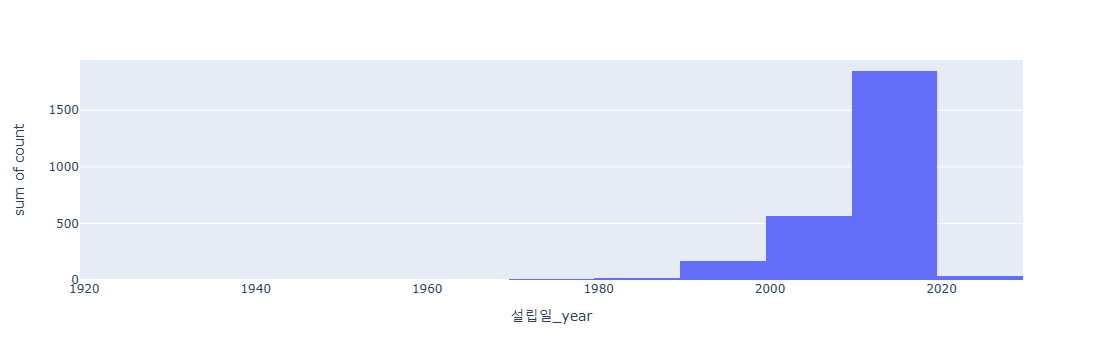

In [43]:
df1 = p1.loc[p1['대분류'] == '정보통신업']
px.histogram(df1,x='설립일_year' , y='count')

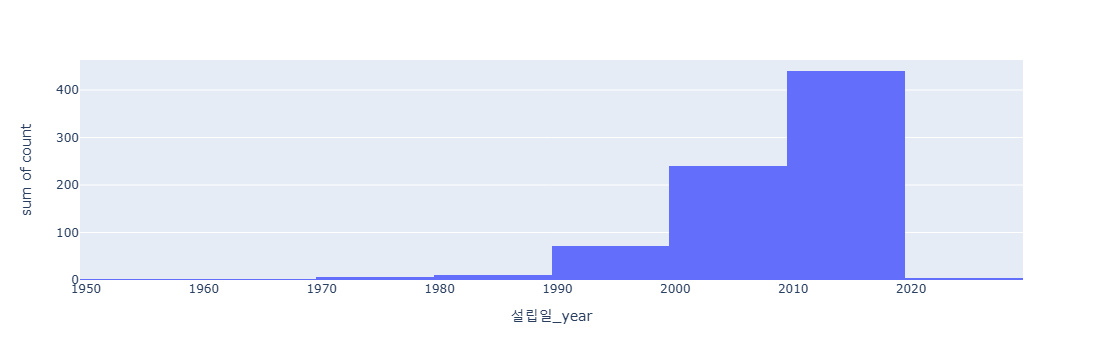

In [35]:
df2 = p1.loc[p1['대분류'] == '도매 및 소매업']
df2
px.histogram(df2,x='설립일_year' , y='count')

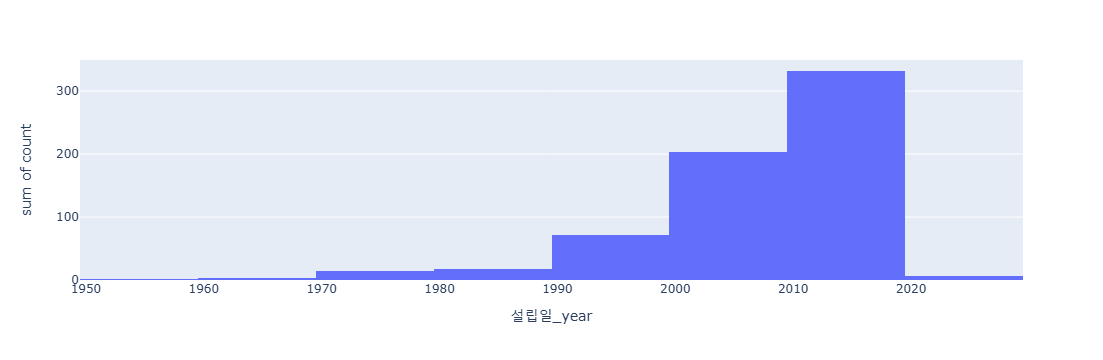

In [36]:
df3 = p1.loc[p1['대분류'] == '제조업']
df3
px.histogram(df3,x='설립일_year' , y='count')

In [37]:
comp_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888634 entries, 0 to 888633
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   888634 non-null  int64  
 1   BusinessNum  888634 non-null  int64  
 2   stYear       887950 non-null  float64
 3   stNm         887950 non-null  object 
 4   acctCd       887950 non-null  object 
 5   accNm        887950 non-null  object 
 6   acctAmt      887947 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 47.5+ MB


In [44]:
m1

,Unnamed: 0,사업자등록번호,Unnamed: 2,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,...,주소,상세주보,대분류,중분류,소분류,세분류,indCd1_str,count,설립일_dt,설립일_year
0,1,1010204456,NaN,씨앤피비즈***,C&P BIZ SOLUT***,함**,5.0,Jun-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,서울 마포구 월드컵북로 137,"(성산동,C.S타워 B3호)",도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510,1,2000-04-14,2000.0
1,36,1608104528,NaN,(주)그린정보***,"GREEN INFORMATION SYATEM CO.KR Co., L***",이**,7.0,Dec-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,서울 마포구 신촌로12다길 20,"1층 (노고산동,스테이하이오피스텔)",도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510,1,2018-01-09,2018.0
2,577,3123102159,NaN,그린아**,Green IT ***,이**,8.0,Sep-21,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,충남 천안시 서북구 오성8길,"30, 401호 (두정동,상지빌딩)",도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510,1,2012-11-01,2012.0
3,636,5048504267,NaN,(주)진두아이에스대***,Jin Do IS Daegu Bra***,손**,NaN,NaN,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,대구광역시 중구 동덕로,64-15 (대봉동),도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510,1,2008-01-14,2008.0
4,846,1138103379,NaN,선진인포텍***,"Sunjin Infotech Co., L***",김**,15.0,Mar-19,46510,"컴퓨터 및 주변장치, 소프트웨어 도매업",...,서울 금천구 가산디지털1로 5,"1613호, 1614호, 1615호, 1616호, 1617호 (가산동,대륭테크노타운...",도매 및 소매업,도매 및 상품 중개업,기계장비 및 관련 물품 도매업,"컴퓨터 및 주변장치, 소프트웨어 도매업",46510,1,1998-08-24,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,9761,1258107565,NaN,성*,NaN,박**,6.0,Apr-22,42129,기타 기반 조성 관련 전문공사업,...,경기도 여주시 흥천면 석화길 27 (외사리),NaN,건설업,전문직별 공사업,기반조성 및 시설물 축조관련 전문공사업,기반조성 관련 전문공사업,42129,1,2007-01-08,2007.0
7486,9155,5028100774,NaN,(주)***,Taegu Broadcasting Corporat***,송**,129.0,Mar-22,60210,지상파 방송업,...,대구 수성구 동대구로 23,(두산동),정보통신업,방송업,텔레비전 방송업,지상파 방송업,60210,1,1994-10-07,1994.0
7487,9282,1168100017,NaN,문화**,NaN,박**,1619.0,May-22,60210,지상파 방송업,...,서울 마포구 성암로 267 (상암동),NaN,정보통신업,방송업,텔레비전 방송업,지상파 방송업,60210,1,1961-12-02,1961.0
7488,9442,1238101777,NaN,환경에너지***,NaN,이**,842.0,Apr-22,38210,지정 외 폐기물 처리업,...,"경기 안양시 동안구 평촌대로212번길 55 6층 (관양동,대고빌딩)",NaN,"수도, 하수 및 폐기물 처리, 원료 재생업","폐기물 수집, 운반, 처리 및 원료 재생업",폐기물 처리업,지정 외 폐기물 처리업,38210,1,2002-01-18,2002.0


# 국가 과제 없는 회사 제외

In [52]:
rnd_list = ntis_assign['BusinessNum'].unique().tolist()

In [73]:
df_rnd = comp_spe_intro.loc[comp_spe_intro['사업자등록번호'].isin(not_rnd_list)]

In [82]:
comp_finance_list = comp_finance['BusinessNum'].unique().tolist()
df_finace = df_rnd.loc[comp_spe_intro['사업자등록번호'].isin(comp_finance_list)]

In [83]:
df_finace.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5937 entries, 0 to 7489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  5937 non-null   int64         
 1   사업자등록번호     5937 non-null   int64         
 2   Unnamed: 2  0 non-null      float64       
 3   기업명         5937 non-null   object        
 4   기업영문명       5437 non-null   object        
 5   대표자명        5937 non-null   object        
 6   종업원수        5638 non-null   float64       
 7   종업원수기준년월    5607 non-null   object        
 8   산업분류코드      5937 non-null   object        
 9   산업분류코드설명    5937 non-null   object        
 10  기업규모        5937 non-null   object        
 11  기업형태        5937 non-null   object        
 12  업태명         5023 non-null   object        
 13  설립일         5740 non-null   float64       
 14  이메일주소       2340 non-null   object        
 15  전화번호        5616 non-null   object        
 16  팩스전화번호      4753 non-null   o

In [84]:
df_finace['대분류'].value_counts()

대분류
정보통신업                       2136
건설업                         1982
도매 및 소매업                     707
제조업                          521
전문, 과학 및 기술 서비스업             226
사업시설 관리, 사업 지원 및 임대 서비스업     103
협회 및 단체, 수리 및 기타 개인 서비스업      51
부동산업                          50
운수 및 창고업                      41
교육 서비스업                       31
금융 및 보험업                      30
숙박 및 음식점업                     26
예술, 스포츠 및 여가관련 서비스업           12
보건업 및 사회복지 서비스업                9
수도, 하수 및 폐기물 처리, 원료 재생업        5
전기, 가스, 증기 및 공기 조절 공급업         4
농업, 임업 및 어업                    2
공공 행정, 국방 및 사회보장 행정            1
Name: count, dtype: int64

In [5]:
df_finace.shape

NameError: name 'df_finace' is not defined

# 재무정보확인

In [37]:
comp_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888634 entries, 0 to 888633
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   888634 non-null  int64  
 1   BusinessNum  888634 non-null  int64  
 2   stYear       887950 non-null  float64
 3   stNm         887950 non-null  object 
 4   acctCd       887950 non-null  object 
 5   accNm        887950 non-null  object 
 6   acctAmt      887947 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 47.5+ MB


In [21]:
comp_finance['accNm'].unique()

array([nan, '유동자산', '당좌자산', '매출채권', '재고자산', '투자자산', '자산총계', '유동부채',
       '비유동부채', '부채총계', '이익잉여금', '자본총계', '매출액', '매출원가', '매출총이익',
       '판매비와관리비', '인건비', '영업이익', '영업외비용', '법인세비용', '당기순이익(손실)', '총자산 증가율',
       '유형자산 증가율', '매출 증가율', '총자산', '자기자본', '차입금', '유동비율', '대손상각비',
       '이자비용', '노무비', '제조경비', '제조원가', '원재료', '자본잉여금', '수출액1', '수출액2',
       '수출액3', '수출액5', '당좌부채(당좌차월)', '수출액4'], dtype=object)

In [15]:
len(comp_finance.loc[comp_finance['accNm']=='인건비']['BusinessNum'].unique())

7271

In [16]:
len(comp_finance['BusinessNum'].unique())

8000

In [36]:
len(comp_finance.loc[comp_finance['accNm']=='매출총이익']['BusinessNum'].unique())

7301

In [45]:
pv1 = comp_finance.pivot_table(index=['BusinessNum','stYear'], values='acctAmt',  aggfunc='mean').reset_index()
pv1 

,BusinessNum,stYear,acctAmt
0,1010109319,2017.0,4.347828e+10
1,1010109319,2018.0,4.761907e+10
2,1010109319,2019.0,4.761907e+10
3,1010204456,2017.0,3.573899e+05
4,1010204456,2018.0,3.900892e+05
...,...,...,...
31332,8998803795,2017.0,1.666667e+11
31333,8998803795,2018.0,8.333410e+10
31334,8998803795,2019.0,1.589174e+06
31335,8998803795,2020.0,1.292393e+06


In [46]:
pv1.shape

(31337, 3)

In [47]:
year_counts = pv1.groupby('BusinessNum')['stYear'].nunique()
filtered_business_nums = year_counts[year_counts <= 4]

BusinessNum
1010109319    3
1010204456    5
1010607727    3
1010709848    2
1011106242    4
             ..
8988107860    4
8988702634    5
8998607522    2
8998708313    5
8998803795    5
Name: stYear, Length: 7316, dtype: int64

In [55]:
filtered_business_nums.index

Index([1010109319, 1010607727, 1010709848, 1011106242, 1018100845, 1018102731,
       1018104121, 1018107650, 1018107961, 1018108627,
       ...
       8938104987, 8948604603, 8962207587, 8968106155, 8968108422, 8968600318,
       8968702730, 8968801450, 8988107860, 8998607522],
      dtype='int64', name='BusinessNum', length=3115)

In [68]:
shutdown_list = []
for i in filtered_business_nums.index :
    if pv1.loc[pv1['BusinessNum'] == i].iloc[0]['stYear'] == 2017.0 :
        shutdown_list.append(pv1.loc[pv1['BusinessNum'] == i].iloc[0]['BusinessNum'])

In [70]:
len(shutdown_list)

1652

# 사업자번호랑 매핑

In [23]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사업자등록번호      10000 non-null  int64 
 1   사업자등록번호_마스킹  10000 non-null  int64 
 2   기업명          9881 non-null   object
 3   대표자명         9881 non-null   object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [24]:
mapping.head(10)

,사업자등록번호,사업자등록번호_마스킹,기업명,대표자명
0,1240440311,1240400001,에스케이텔레콤,신현국
1,1242151566,1242100002,에스케이텔레콤,이재영
2,1171449462,1171400003,에스케이텔레콤,임채선
3,1212087845,1212000004,에스케이텔레콤,김현미
4,1274051488,1274000005,네이버,김태영
5,1058213581,1058200006,서강대학교산학협력단,정현식
6,5382500866,5382500007,우진,박찬우
7,1198119350,1198100008,천재교육,오병목
8,1100235682,1100200009,대상,이재임
9,1388201372,1388200010,정보통신정책연구원,권호열


In [14]:
mapping['기업명'].unique().tolist()

['에스케이텔레콤',
 '네이버',
 '서강대학교산학협력단',
 '우진',
 '천재교육',
 '대상',
 '정보통신정책연구원',
 '인포뱅크',
 '한국연구재단',
 nan,
 '삼우이엔씨',
 '에스엘',
 '문화방송',
 '케이씨',
 '에스케이플래닛',
 '더페이스샵',
 '아이온커뮤니케이션즈',
 '엑스퍼트컨설팅',
 '디엘',
 '이룸',
 '비바리퍼블리카',
 '아이진',
 '매스씨앤지',
 '엘에스',
 '이에스',
 '난다',
 '씨에스텍',
 '시대고시기획시대교육',
 '대학내일',
 '엘지헬로비전',
 '파수',
 '애경자산관리',
 '블루솔루션즈',
 '대우',
 '디케이',
 '대우건설',
 '디케이아이테크놀로지',
 '기아자동차',
 '에이츠',
 '엘씨케이',
 '오에이티씨',
 '에이아이테크',
 '에스케이',
 '신원',
 '이스트소프트',
 '제페토',
 '세종텔레콤',
 '제이에스테크',
 '에코밸리',
 '일성',
 '신흥',
 '위두커뮤니케이션즈',
 '한마음',
 '나인',
 '이레',
 '제이와이피엔터테인먼트',
 '아이씨티',
 '대방건설',
 '에이아이딥',
 '부림',
 '제이엔씨',
 '대교',
 '제이텍',
 '기가텍',
 '원진',
 '세니온',
 '아이엠티',
 '애니캐스팅',
 '에이앤아이',
 '페더럴익스프레스코리아',
 '센스톤',
 '재능교육',
 '씨티에스',
 '홍익대학교산학협력단',
 '티아이스퀘어',
 '덕양산업',
 '아이티엘',
 '와이즈와이어즈',
 '제이엠아이',
 '정보통신기획평가원',
 '휴톰',
 '그라비티',
 '미래정보통신',
 '잉글리시에그',
 '마크애니',
 '피닉스다트',
 '한국정보인증',
 '네이버클라우드',
 '인포마인드',
 '에드모텍',
 '큐로드',
 '대성전기공업',
 '미래테크',
 '금성통신',
 '제이에스시스템',
 '솔브레인',
 '가온',
 '다누시스',
 '하이브',
 '코아텍',
 '로보러스',
 '탑손해사정',
 '아이디스',
 '제이엔에스텍',

In [30]:
mapping.loc[mapping['기업명'] =='대성산업']

,사업자등록번호,사업자등록번호_마스킹,기업명,대표자명
290,1238625633,1238600291,대성산업,전찬진
651,1130224001,1130200652,대성산업,윤여환


In [32]:
comp_spe_intro.loc[comp_spe_intro['사업자등록번호'] == 1238600291]

,Unnamed: 0,사업자등록번호,Unnamed: 2,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,기업형태,업태명,설립일,이메일주소,전화번호,팩스전화번호,우편번호,주소,상세주보
9414,9414,1238600291,NaN,대성**,NaN,전**,9.0,Mar-19,42412.0,"도배, 실내 장식 및 내장 목공사업",중소기업,일반,건 설 업,20110114.0,NaN,031-444-9636,NaN,NaN,경기도 안양시 동안구 관악대로374번길 12 306호 (관양동),NaN


In [38]:
jobplanet_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29265 entries, 0 to 29264
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      29265 non-null  int64  
 1   BusinessNum     29265 non-null  int64  
 2   Job             22484 non-null  object 
 3   EmployeeStatus  23123 non-null  object 
 4   ReviewDate      22774 non-null  object 
 5   TotScore        23123 non-null  float64
 6   PromotionScore  23123 non-null  float64
 7   WelfareScore    23123 non-null  float64
 8   BalanceScore    23123 non-null  float64
 9   CultureScore    23123 non-null  float64
 10  ExecutiveScore  23123 non-null  float64
 11  ReviewTitle     23123 non-null  object 
 12  Advantage       23123 non-null  object 
 13  Disadvantage    23123 non-null  object 
 14  ForExecutive    23118 non-null  object 
 15  GrowthYN        15735 non-null  object 
 16  RecommendYN     21834 non-null  object 
dtypes: float64(6), int64(2), object

In [41]:
len(jobplanet_review['BusinessNum'].unique())

8000